In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


## Konversionsfaktoren
Die Berechnung der stündlichen Primärenergie und Treibhausgas-Emissionen des Netzstroms erfolgt auf Basis der von (Stolz & Frischknecht, 2017) erhobenen Konversionsfaktoren:


In [4]:
s = "AtomkraftwerkMJ4.21 0.06 4.14 0.01 - 0.006 0.005 125.8 Erdgaskombikraftwerk GuDMJ2.22 2.21 0.01 0.01 - 0.129 0.121 85.6 Braunkohlekraftwerk (Dampf)MJ3.95 3.90 0.03 0.01 - 0.377 0.370 220.2 Steinkohlekraftwerk (Dampf)MJ3.94 3.87 0.04 0.03 - 0.344 0.298 213.4 Kraftwerk SchwerölMJ3.83 3.78 0.04 0.01 - 0.281 0.268 302.5 KehrichtverbrennungMJ0.02 0.01 0.00 0.00 1.11 0.002 0.001 8.9 Heizkraftwerk HolzMJ3.88 0.19 0.05 3.64 - 0.033 0.012 81.9 Blockheizkraftwerk DieselMJ3.28 3.23 0.04 0.01 - 0.229 0.215 187.9 Blockheizkraftwerk GasMJ2.94 2.92 0.01 0.01 - 0.186 0.159 122.3 Blockheizkraftwerk BiogasMJ0.91 0.50 0.32 0.09 1.11 0.112 0.032 103.8 Blockheizkraftwerk Biogas, LandwirtschaftMJ0.19 0.09 0.06 0.04 1.11 0.049 0.006 63.8 FotovoltaikMJ1.56 0.28 0.05 1.22 - 0.027 0.022 48.4 Fotovoltaik SchrägdachMJ1.54 0.27 0.05 1.22 - 0.025 0.021 46.9 Fotovoltaik FlachdachMJ1.55 0.28 0.04 1.22 - 0.027 0.022 43.2 Fotovoltaik FassadeMJ1.70 0.39 0.07 1.24 - 0.037 0.032 62.6 WindkraftMJ1.29 0.08 0.01 1.20 - 0.007 0.006 20.5 WasserkraftMJ1.20 0.02 0.01 1.17 - 0.003 0.002 12.2 PumpspeicherungMJ3.90 0.46 2.81 0.63 - 0.039 0.034 125.3 Heizkraftwerk GeothermieMJ3.36 0.16 0.03 3.17 - 0.009 0.008 28.6 CH-ProduktionsmixMJ2.50 0.07 1.78 0.66 - 0.007 0.005 63.5 Mix zertifizierte Stromprodukte CHMJ1.21 0.03 0.01 1.17 0.01 0.004 0.003 13.3 CH-VerbrauchermixMJ3.00 0.35 2.17 0.49 0.02 0.028 0.025 96.4 ENTSO-E-MixMJ3.18 1.80 1.09 0.30 - 0.146 0.136 152.2"
db = [i.split(" ") for i in s.split("MJ")]



In [5]:
new = []
for r, row in enumerate(db):
    new.append(list())
    for i, item in enumerate(row):
        try:
            f = float(item)
            new[r-1].append(f)
        except ValueError:
            if item == "-":
                new[r-1].append(0.)
            else:
                new[r].append(item)

In [6]:
new2 = list()
for row in new:
    l = len(row)
    h = " ".join(row[0:-8])
    new2.append([h,*row[-8:]])
new2 = new2[:-1]

In [7]:
header = """Primärenergiefaktor total [MJ-eq]
Primärenergiefaktor fossil [MJ-eq]
Primärenergiefaktor nuklear  [MJ-eq]
Primärenergiefaktor total erneuerbar [MJ-eq]
Primärenergiefaktor Abwärme / Abfall [MJ-eq]
CO2-Äquivalente  [kg CO2-eq]
Kohlendioxid, fossil [kg CO2-eq]
Umweltbelastungspunkte [UBP'13]"""
header = header.split("\n")
header


['Primärenergiefaktor total [MJ-eq]',
 'Primärenergiefaktor fossil [MJ-eq]',
 'Primärenergiefaktor nuklear  [MJ-eq]',
 'Primärenergiefaktor total erneuerbar [MJ-eq]',
 'Primärenergiefaktor Abwärme / Abfall [MJ-eq]',
 'CO2-Äquivalente  [kg CO2-eq]',
 'Kohlendioxid, fossil [kg CO2-eq]',
 "Umweltbelastungspunkte [UBP'13]"]

In [8]:
faktoren = {r[0]: {h:v for h, v in zip(header, r[1:]) } for r in new2}
for i in faktoren.keys():
    print(i)

Atomkraftwerk
Erdgaskombikraftwerk GuD
Braunkohlekraftwerk (Dampf)
Steinkohlekraftwerk (Dampf)
Kraftwerk Schweröl
Kehrichtverbrennung
Heizkraftwerk Holz
Blockheizkraftwerk Diesel
Blockheizkraftwerk Gas
Blockheizkraftwerk Biogas
Blockheizkraftwerk Biogas, Landwirtschaft
Fotovoltaik
Fotovoltaik Schrägdach
Fotovoltaik Flachdach
Fotovoltaik Fassade
Windkraft
Wasserkraft
Pumpspeicherung
Heizkraftwerk Geothermie
CH-Produktionsmix
Mix zertifizierte Stromprodukte CH
CH-Verbrauchermix
ENTSO-E-Mix


(Stolz & Frischknecht, 2017, s.5)
> Tab. 2.1 Primärenergiefaktoren und Umweltauswirkungen von Energiesystemen EGoT: Bezugsgrösse ist die in den Tank oder in das Gebäude gelieferte Energie (oberer Heizwert); ohne Aufwen-dungen für die Herstellung des im Gebäude liegenden Energiewandlers beziehungsweise des Transportmittels; inklusive Betriebsemissionen des im Gebäude liegenden Energiewandlers beziehungsweise des Transportmittels

In [9]:
f = pd.DataFrame(faktoren).transpose()
f

,Primärenergiefaktor total [MJ-eq],Primärenergiefaktor fossil [MJ-eq],Primärenergiefaktor nuklear [MJ-eq],Primärenergiefaktor total erneuerbar [MJ-eq],Primärenergiefaktor Abwärme / Abfall [MJ-eq],CO2-Äquivalente [kg CO2-eq],"Kohlendioxid, fossil [kg CO2-eq]",Umweltbelastungspunkte [UBP'13]
Atomkraftwerk,4.21,0.06,4.14,0.01,0.00,0.006,0.005,125.8
Erdgaskombikraftwerk GuD,2.22,2.21,0.01,0.01,0.00,0.129,0.121,85.6
Braunkohlekraftwerk (Dampf),3.95,3.90,0.03,0.01,0.00,0.377,0.370,220.2
Steinkohlekraftwerk (Dampf),3.94,3.87,0.04,0.03,0.00,0.344,0.298,213.4
Kraftwerk Schweröl,3.83,3.78,0.04,0.01,0.00,0.281,0.268,302.5
Kehrichtverbrennung,0.02,0.01,0.00,0.00,1.11,0.002,0.001,8.9
Heizkraftwerk Holz,3.88,0.19,0.05,3.64,0.00,0.033,0.012,81.9
Blockheizkraftwerk Diesel,3.28,3.23,0.04,0.01,0.00,0.229,0.215,187.9
Blockheizkraftwerk Gas,2.94,2.92,0.01,0.01,0.00,0.186,0.159,122.3
Blockheizkraftwerk Biogas,0.91,0.50,0.32,0.09,1.11,0.112,0.032,103.8


<AxesSubplot:>

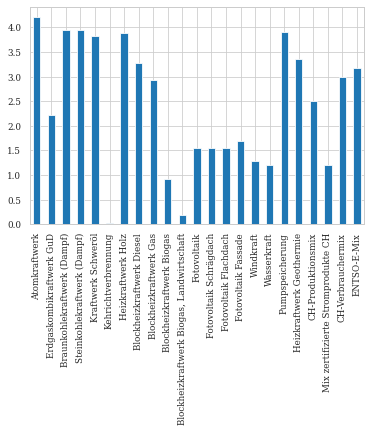

In [10]:
f["Primärenergiefaktor total [MJ-eq]"].plot(kind="bar")

